# Google Business Store Dataset


In [1]:
from util import agg_jsonls  # helper function
from pprint import pprint
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import branca
import geopandas
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("final_dataset_GB_1704"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 140416 reviews!
{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
 'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
 'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': '3 semanas atrás',
 'retrieval_date': '2020-04-13T17:25:36Z',
 'store': 'casas-bahia',
 'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
 'username': 'Veranilce Carelli'}


In [3]:
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 40.15%


In [4]:
pprint(caption_reviews[0:3])

[{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 4.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
  'username': 'Veranilce Carelli'},
 {'caption': 'Atendimento muito bom.!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMjI5TjdNM2ZNb3FMNTQwZ2VB',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 5.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/115563939635497280539?hl=pt-BR',
  'username': 'Mathias Villan'},
 {

In [5]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")

Average grade 3.9190120783956246


In [6]:
relative_date = {
    'uma semana atrás': 7,
    '2 semanas atrás': 14,
    '3 semanas atrás': 21, 
    '4 semanas atrás': 28, 
    'um mês atrás': 30,
    '2 meses atrás': 60, 
    '3 meses atrás': 90, 
    '4 meses atrás': 120, 
    '5 meses atrás': 150,
    '6 meses atrás': 180, 
    '7 meses atrás': 210, 
    '8 meses atrás': 240, 
    '9 meses atrás': 270,
    '10 meses atrás': 300, 
    '11 meses atrás': 330, 
    'um ano atrás': 365, 
    '2 anos atrás': 730,
    '3 anos atrás': 1095, 
    '4 anos atrás': 1460, 
    '5 anos atrás': 1825, 
    '6 anos atrás': 2190,
    '7 anos atrás': 2555, 
    '8 anos atrás': 2920, 
}

In [7]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

def format_GB_to_df(review):
    cols_for_df = ['caption', 'id_review' , 'n_photo_user', 'n_review_user', 
                   'rating' , 'relative_date', 'retrieval_date', 'store', 'url_user', 'username']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp['latitude'] = review['geo_location']['lat'] if "geo_location" in review and "lat" in review['geo_location'] else np.nan
    r_cp['longitude'] = review['geo_location']['long'] if "geo_location" in review and "long" in review['geo_location'] else np.nan
    r_cp["len_comment"] = len(review['caption'])
    r_cp["relative"] = relative_date[review['relative_date']]
    r_cp["date_comment"] = comment_day(review)
    return r_cp

In [8]:
dff = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
dff.head()

,caption,date_comment,id_review,latitude,len_comment,longitude,n_photo_user,n_review_user,rating,relative,relative_date,retrieval_date,store,url_user,username
0,Muito boa! O Cleversom nos atendeu com muita ...,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS...,-23.5448085,64,-46.5175485,0,0,4.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1097179363...,Veranilce Carelli
1,Atendimento muito bom.!,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMj...,-23.5448085,23,-46.5175485,0,0,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1155639396...,Mathias Villan
2,,2020-03-23 17:25:36,ChZDSUhNMG9nS0VJQ0FnSUNjaFphblhBEAEaFmM0cTBhaV...,-23.5448085,0,-46.5175485,0,6,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1147321611...,Maristela Boguta
3,,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjaGNidzNBRRABGhZ4Z3Z6bG...,-23.5448085,0,-46.5175485,0,5,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1067857579...,Daniele Andrade
4,👍🏼,2020-03-16 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjLWFHYjF3RRABGhZROFBDNF...,-23.5448085,2,-46.5175485,0,0,5.0,28,4 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1042944931...,Pastor L L j


In [9]:
dff['store_location'] = "(" + dff.latitude +","+ dff.longitude + ")"
dff['year'] = dff['date_comment'].dt.year
dff['month'] = dff['date_comment'].dt.strftime('%m/%Y')
dff['week'] = dff['date_comment'].dt.week
dff['latitude'] = dff['latitude'].map(float)
dff['longitude'] = dff['longitude'].map(float)

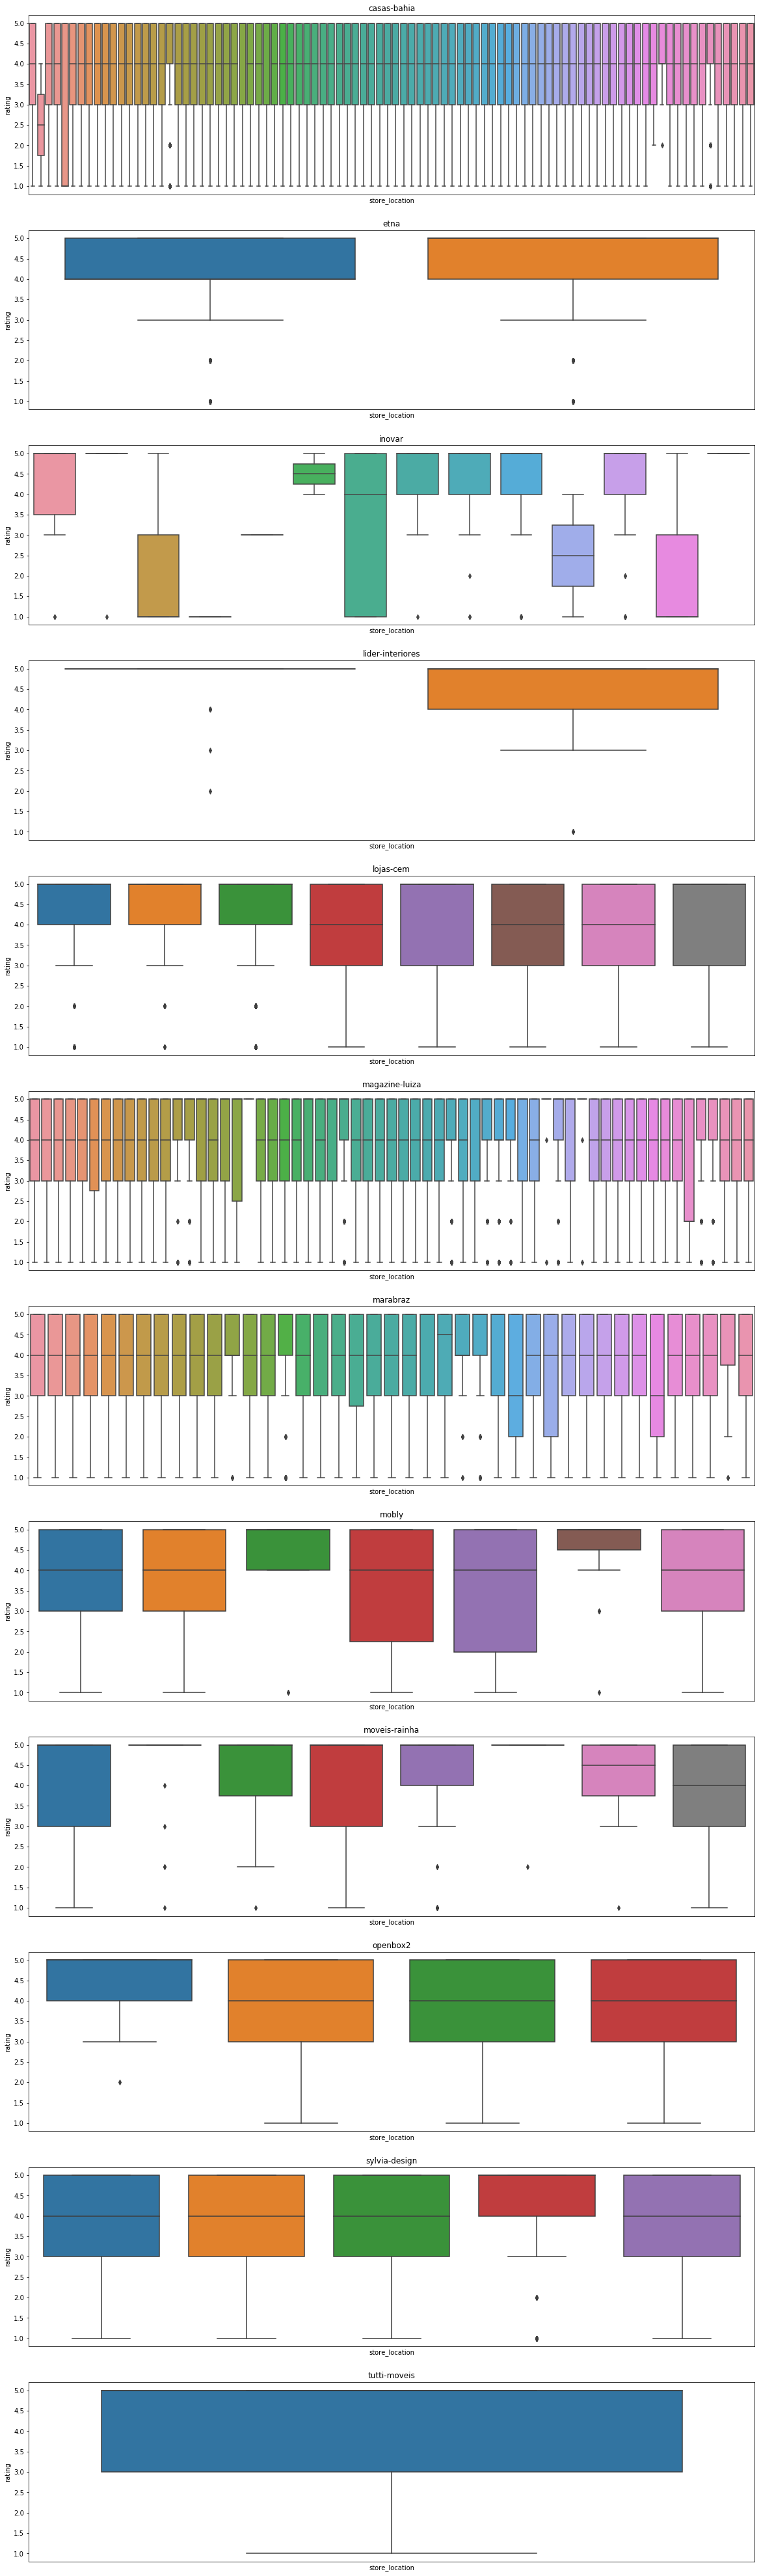

In [10]:
i=1
fig = plt.figure(figsize=(20,72))

for st in dff[~dff['store'].isna()]['store'].unique():
    ax = plt.subplot(12,1,i)
    sns.boxplot(y=dff[dff['store']==st]['rating'], x=dff[dff['store']==st]['store_location'])
    plt.title(st)
    plt.xticks([])
    i=i+1

In [11]:
store_df = dff.groupby(['store', 'store_location']).agg({'rating':['count', 'mean', 'median'], 
                                                             'len_comment': 'mean'})

store_df_agg = pd.DataFrame(store_df.to_records())
store_df_agg.columns = ['store','store_location','rating_count', 'rating_mean', 'rating_median', 'len_comment_mean']

In [12]:
store_df_agg.head()

,store,store_location,rating_count,rating_mean,rating_median,len_comment_mean
0,casas-bahia,"(-23.4060459,-46.7557701)",1291,3.860573,4.0,16.333075
1,casas-bahia,"(-23.4456698,-46.725358)",2,2.500000,2.5,0.000000
2,casas-bahia,"(-23.4724487,-46.6688508)",518,3.789575,4.0,19.913127
3,casas-bahia,"(-23.4728562,-46.6932331)",1028,3.801556,4.0,20.328794
4,casas-bahia,"(-23.4745512,-46.6709766)",1390,3.887770,4.0,22.948201


In [13]:
store_df_agg['store'].unique()

array(['casas-bahia', 'etna', 'inovar', 'lider-interiores', 'lojas-cem',
       'magazine-luiza', 'marabraz', 'mobly', 'moveis-rainha', 'openbox2',
       'sylvia-design', 'tutti-moveis'], dtype=object)

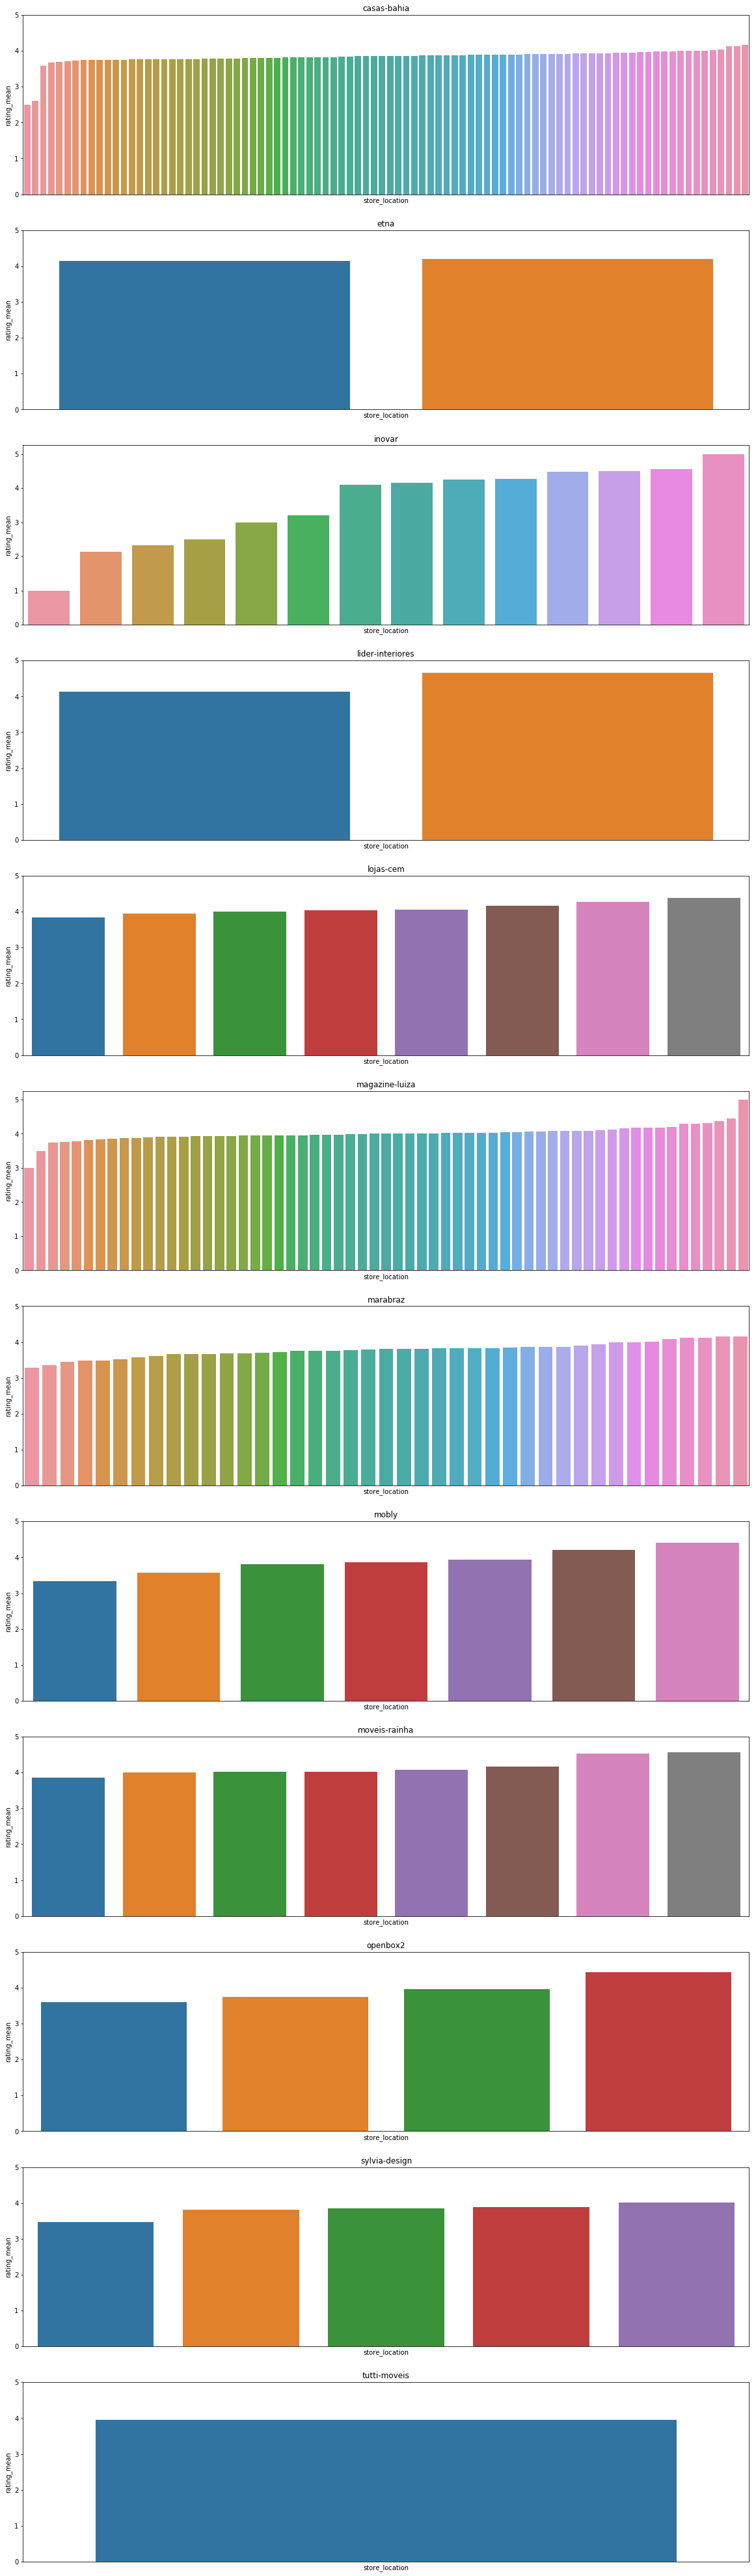

In [14]:
i=1
fig = plt.figure(figsize=(20,72))

for st in store_df_agg[~store_df_agg['store'].isna()]['store'].unique():
    bar = store_df_agg[store_df_agg['store']==st].sort_values(by='rating_mean')
    ax = plt.subplot(12,1,i)
    sns.barplot(y=bar['rating_mean'], x=bar['store_location'])
    plt.title(st)
    plt.xticks([])
    ax.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    i=i+1

In [15]:
store_df_agg[~store_df_agg['store'].isna()]['store'].unique()

array(['casas-bahia', 'etna', 'inovar', 'lider-interiores', 'lojas-cem',
       'magazine-luiza', 'marabraz', 'mobly', 'moveis-rainha', 'openbox2',
       'sylvia-design', 'tutti-moveis'], dtype=object)

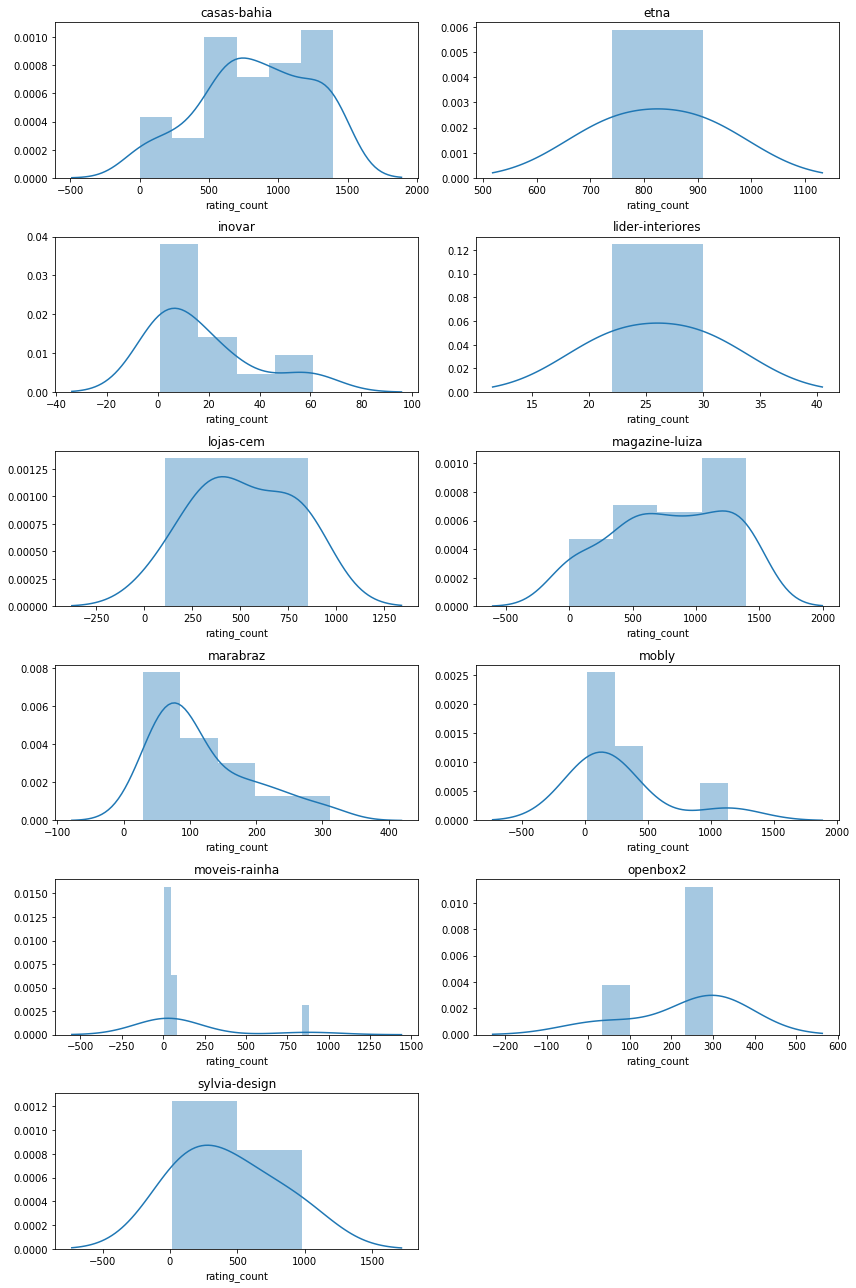

In [16]:
sp = 1
fig = plt.figure(figsize=(12,18))
for st in store_df_agg[~store_df_agg['store'].isna()]['store'].unique()[:-1]: #taking Tutti Moveis (1 store only)
    hist = store_df_agg[store_df_agg['store']==st]
    plt.subplot(6,2,sp)
    sns.distplot(hist['rating_count'])
    plt.title(st)
    sp=sp+1
plt.tight_layout()

In [17]:
best_stores = list()

In [18]:
for st in store_df_agg['store'].unique():
    max_mean = max(store_df_agg[(store_df_agg['store']==st) 
                               &((store_df_agg['rating_count']>10))]['rating_mean'])
    index_best = store_df_agg[(store_df_agg['store']==st)
                              &(store_df_agg['rating_mean']==max_mean)]['store_location'].index[0]
    value_best = store_df_agg[(store_df_agg['store']==st)
                              &(store_df_agg['rating_mean']==max_mean)]['store_location'][index_best]
    best_stores.append(value_best)

In [19]:
best_stores

['(-23.5244387,-46.5499285)',
 '(-23.6163541,-46.6981533)',
 '(-23.4808667,-46.6056863)',
 '(-23.5675496,-46.6779825)',
 '(-23.6569031,-46.7086388)',
 '(-23.5072691,-46.4921458)',
 '(-23.4879579,-46.7199711)',
 '(-23.5249678,-46.552138)',
 '(-23.5000671,-46.6281411)',
 '(-23.5409951,-46.6464974)',
 '(-23.5997497,-46.6880305)',
 '(-23.5625817,-46.5049787)']

In [20]:
store_df_agg[store_df_agg['store_location'].isin(best_stores)]

,store,store_location,rating_count,rating_mean,rating_median,len_comment_mean
30,casas-bahia,"(-23.5244387,-46.5499285)",31,4.161290,4.0,26.451613
91,etna,"(-23.6163541,-46.6981533)",740,4.191892,5.0,34.039189
93,inovar,"(-23.4808667,-46.6056863)",21,4.476190,5.0,42.809524
107,lider-interiores,"(-23.5675496,-46.6779825)",30,4.666667,5.0,22.166667
114,lojas-cem,"(-23.6569031,-46.7086388)",110,4.390909,5.0,26.800000
130,magazine-luiza,"(-23.5072691,-46.4921458)",159,4.364780,5.0,29.880503
182,marabraz,"(-23.4879579,-46.7199711)",193,4.160622,5.0,31.388601
220,mobly,"(-23.5249678,-46.552138)",15,4.400000,5.0,69.800000
229,moveis-rainha,"(-23.5000671,-46.6281411)",28,4.535714,5.0,110.357143
234,openbox2,"(-23.5409951,-46.6464974)",33,4.424242,5.0,53.575758


In [21]:
worst_stores = list()

In [22]:
for st in store_df_agg['store'].unique():
    min_mean = min(store_df_agg[(store_df_agg['store']==st) 
                               &((store_df_agg['rating_count']>5))]['rating_mean'])
    index_worst = store_df_agg[(store_df_agg['store']==st)
                              &(store_df_agg['rating_mean']==min_mean)]['store_location'].index[0]
    value_worst = store_df_agg[(store_df_agg['store']==st)
                              &(store_df_agg['rating_mean']==min_mean)]['store_location'][index_worst]
    worst_stores.append(value_worst)

In [23]:
worst_stores

['(-23.6868733,-46.7731199)',
 '(-23.5279693,-46.5805578)',
 '(-23.5348215,-46.7735994)',
 '(-23.5148402,-46.6153721)',
 '(-23.5810807,-46.4127466)',
 '(-23.6529702,-46.70961)',
 '(-23.5227286,-46.7074272)',
 '(-23.6667069,-46.7219906)',
 '(-23.6590584,-46.7687407)',
 '(-23.600535,-46.6270041)',
 '(-23.5349549,-46.6024344)',
 '(-23.5625817,-46.5049787)']

In [24]:
store_df_agg[store_df_agg['store_location'].isin(worst_stores)]

,store,store_location,rating_count,rating_mean,rating_median,len_comment_mean
84,casas-bahia,"(-23.6868733,-46.7731199)",781,3.586428,4.0,24.416133
90,etna,"(-23.5279693,-46.5805578)",910,4.136264,4.0,30.507692
99,inovar,"(-23.5348215,-46.7735994)",7,2.142857,1.0,160.857143
106,lider-interiores,"(-23.5148402,-46.6153721)",22,4.136364,5.0,104.590909
112,lojas-cem,"(-23.5810807,-46.4127466)",326,3.834356,4.0,17.104294
169,magazine-luiza,"(-23.6529702,-46.70961)",28,3.500000,4.0,26.964286
189,marabraz,"(-23.5227286,-46.7074272)",66,3.287879,3.0,21.318182
224,mobly,"(-23.6667069,-46.7219906)",263,3.338403,4.0,49.182510
231,moveis-rainha,"(-23.6590584,-46.7687407)",881,3.864926,4.0,18.127128
236,openbox2,"(-23.600535,-46.6270041)",300,3.600000,4.0,37.503333


In [25]:
var_month = ['um ano atrás', '11 meses atrás', '10 meses atrás', '9 meses atrás', '8 meses atrás', 
             '7 meses atrás', '6 meses atrás', '5 meses atrás', '4 meses atrás', '3 meses atrás', 
             '2 meses atrás', 'um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']

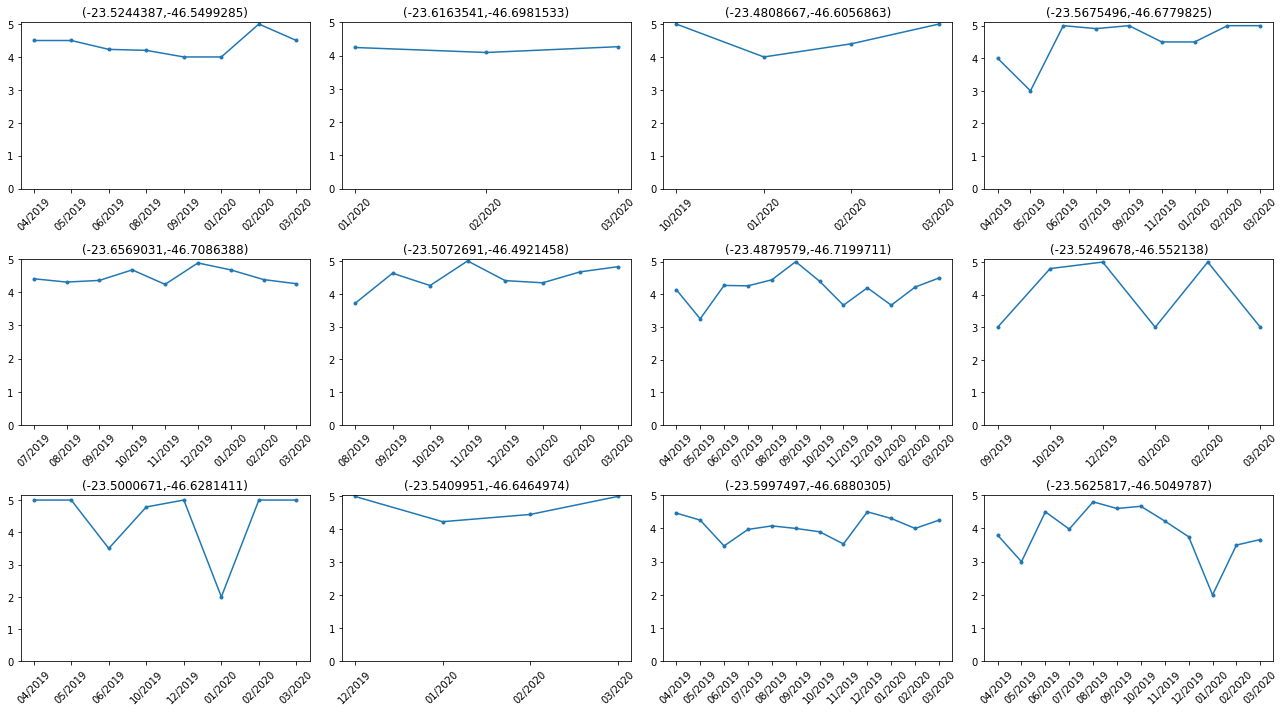

In [26]:
j=1
fig = plt.figure(figsize=(18,10))
for i in best_stores:
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store_location']==i].copy()
    graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
    plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()

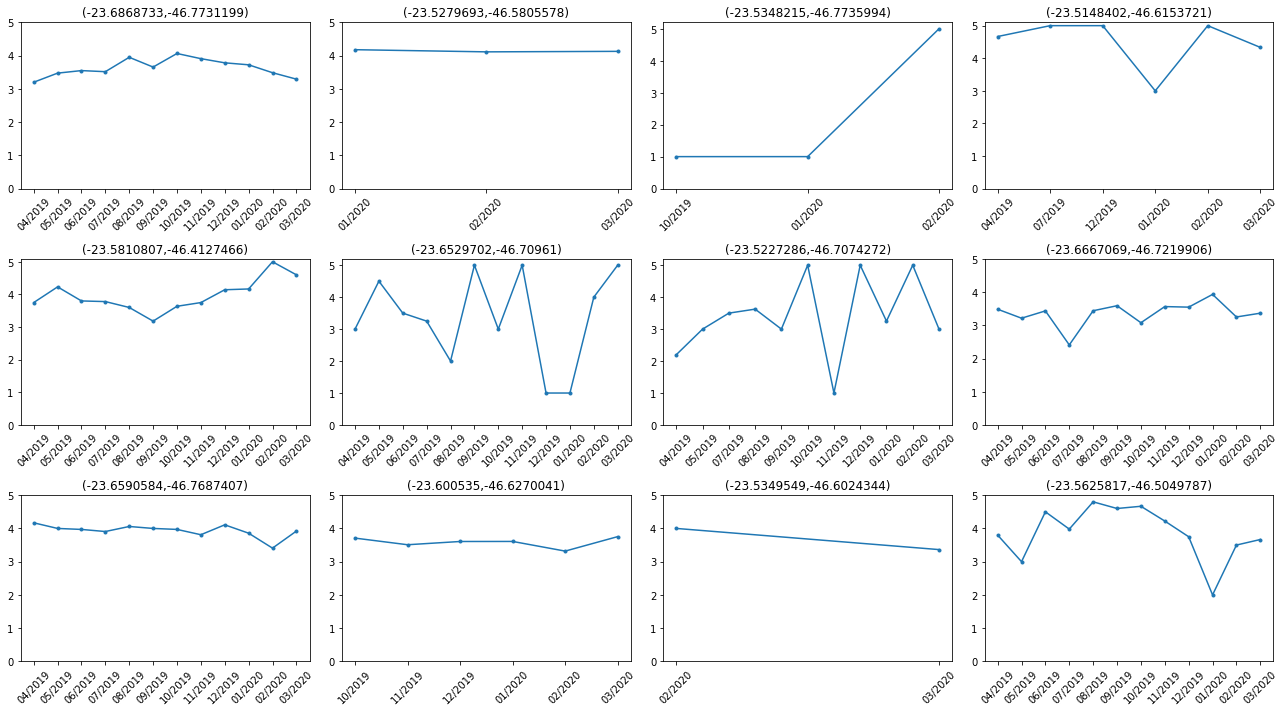

In [27]:
j=1
fig = plt.figure(figsize=(18,10))
for i in worst_stores:
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store_location']==i].copy()
    graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
    plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()

In [28]:
def evolution_store(store, store_location):
    var_month = ['um ano atrás', '11 meses atrás', '10 meses atrás', '9 meses atrás', '8 meses atrás', 
             '7 meses atrás', '6 meses atrás', '5 meses atrás', '4 meses atrás', '3 meses atrás', 
             '2 meses atrás', 'um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']
    fig, ax = plt.subplots(figsize=(6,6))
    graph = dff[dff['store_location']==store_location].copy()
    graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
    plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
    plt.title(store + ' - ' + store_location)
    ax.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    plt.xticks(rotation=45);

In [29]:
def month_distribution(store, store_location):
    last_month = ['um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']    
    graph = dff[(dff['store_location']==store_location)&(dff['relative_date'].isin(last_month))]
    sns.countplot(graph['rating'])
    plt.title('Month ratings - ' + store_location);

In [30]:
def store_bench(store, data):
    max_mean = max(data[(data['store']==store) 
                               &((data['rating_count']>10))]['rating_mean'])
    index_best = data[(data['store']==store)
                              &(data['rating_mean']==max_mean)]['store_location'].index[0]
    value_best = data[(data['store']==store)
                              &(data['rating_mean']==max_mean)]['store_location'][index_best]
    return value_best

In [31]:
def statistics_store(store, store_location):
    df_store = dff[dff['store']==store]
    store_df = df_store.groupby(['store', 'store_location']).agg({'rating':['count', 'mean', 'median'], 
                                                             'len_comment': 'mean'})
    store_agg = pd.DataFrame(store_df.to_records())
    store_agg.columns = ['store','store_location','rating_count', 'rating_mean', 'rating_median', 'len_comment_mean']
    
    month_distribution(store, store_location)
    evolution_store(store, store_location)
    
    bench_mean = max(store_agg[store_agg['store_location']==store_bench(store, store_agg)]['rating_mean'])
    count_location = max(store_agg[store_agg['store_location']==store_location]['rating_count'])
    mean_location = max(store_agg[store_agg['store_location']==store_location]['rating_mean'])
    median_location = max(store_agg[store_agg['store_location']==store_location]['rating_median'])
    print('This store has {} reviews with a rating average of {}'.format(count_location,round(mean_location,2)))
    print('The mean benchmark for this store from {} is {}'.format(store, round(bench_mean,2)))

This store has 781 reviews with a rating average of 3.59
The mean benchmark for this store from casas-bahia is 4.16


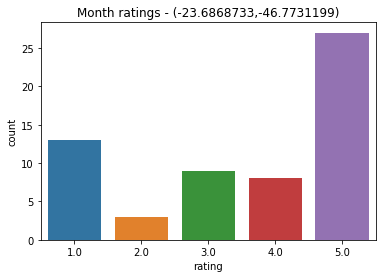

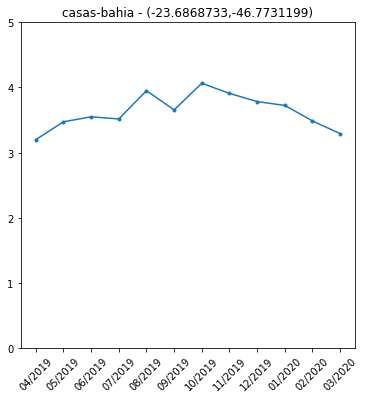

In [32]:
statistics_store('casas-bahia', '(-23.6868733,-46.7731199)')

In [33]:
def scatter_geo(store=''):
    if(store==''):
        df_store = dff.copy()
        title = 'Geolocation distribution of the stores'
    else:
        df_store = dff[dff['store']==store].copy()
        title = 'Geolocation distribution - '+ store
    store_df = df_store.groupby(['store', 'store_location','latitude','longitude']).agg({'rating':['count', 'mean', 'median'], 
                                                                                         'len_comment': 'mean'})
    store_agg = pd.DataFrame(store_df.to_records())
    store_agg.columns = ['store','store_location','latitude','longitude','rating_count', 
                        'rating_mean', 'rating_median', 'len_comment_mean']

    fig, ax = plt.subplots(figsize=(8,6))
    plt.scatter(x='latitude', y='longitude', c='rating_mean', data=store_agg, cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title(title)
    

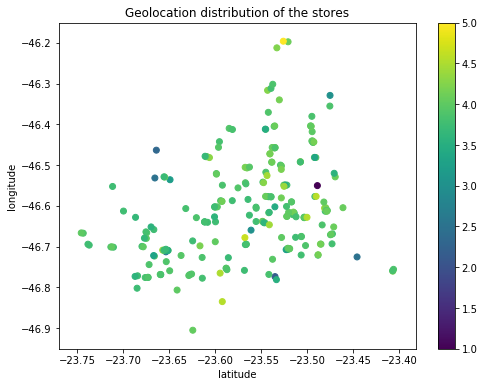

In [34]:
scatter_geo()

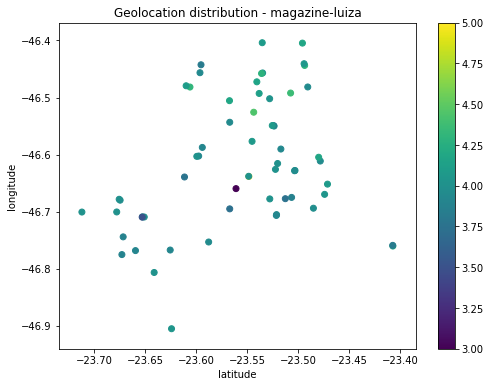

In [35]:
scatter_geo('magazine-luiza')

In [36]:
def find_neighboor(lat, long):
    point = Point(long,lat)
    for i in range(len(geo_json_data)):
        if(point.within(geo_json_data.iloc[i,2])):
            return geo_json_data.iloc[i,1]

In [37]:
geo_json_data = geopandas.read_file("SP - Neighborhoods.geojson", driver = "GeoJSON")
geo_json_data['district'] = geo_json_data['district'].str.title()

In [38]:
dff['district'] = dff.apply(lambda x: find_neighboor(x['latitude'],x['longitude']), axis=1)

In [39]:
def scatter_geo_map(store='', neighborhood=''):
    if(store==''):
        df_store = dff.copy()
        title = 'Geolocation distribution of the stores'
    else:
        df_store = dff[dff['store']==store].copy()
        title = 'Geolocation distribution - '+ store
    
    neighbor_df = dff.copy()
    
    if(neighborhood!=''):
        df_store = df_store[df_store['district']==neighborhood]
        neighbor_df = neighbor_df[neighbor_df['district']==neighborhood]
        geo_json_data_df = geo_json_data[geo_json_data['district']==neighborhood]
    else:
        geo_json_data_df = geo_json_data.copy()
    
    store_df = df_store.groupby(['store', 'district','store_location','latitude','longitude']).agg({'rating':['count', 'mean', 'median'], 
                                                                                         'len_comment': 'mean'})
    store_agg = pd.DataFrame(store_df.to_records())
    store_agg.columns = ['store','district','store_location','latitude','longitude','rating_count', 
                        'rating_mean', 'rating_median', 'len_comment_mean']
    
    store_agg.loc[store_agg['rating_mean']>= 0, 'Range'] = 'Bad'
    store_agg.loc[store_agg['rating_mean']>= 3, 'Range'] = 'Neutral'
    store_agg.loc[store_agg['rating_mean']>= 4, 'Range'] = 'Good'
    
    neighbor_df = neighbor_df.groupby(['district']).agg({'rating':['count', 'mean', 'median'],'store': pd.Series.nunique})
    neighbor_agg = pd.DataFrame(neighbor_df.to_records())
    neighbor_agg.columns = ['district','rating_count','rating_mean', 'rating_median', 'store_count']
    
    geo_json_data_df = geo_json_data_df.join(neighbor_agg.set_index("district"), how = "left", on = "district")
    geo_json_data_df.loc[geo_json_data_df['rating_mean'].isna(), 'rating_mean'] = -1
    
    colors = {'Bad': 'red','Neutral': 'orange','Good': 'green'}
    
    colormap = branca.colormap.LinearColormap(
        colors=['white','red','yellow','green'],
        vmin=0,
        vmax=5
    )

    style_function = lambda x: {
        'fillColor': colormap(x['properties']['rating_mean']),
        'color': 'black',
        'weight':2,
        'fillOpacity':0.5
    }

    mapa = folium.Map(
        width=800, height=500,
        location=[-23.5810,-46.6216], 
        zoom_start=10
    )
    
    if(store=='' and neighborhood==''):
        citygeo = folium.GeoJson(
            geo_json_data_df.to_json(),
            name='Districts',
            style_function=style_function,
            tooltip=folium.GeoJsonTooltip(
                fields=['district','store_count', 'rating_mean'],
                aliases=['','Store', 'Rating'], 
                localize=True
            )
        ).add_to(mapa)
            
    else:
        citygeo = folium.GeoJson(
            geo_json_data_df.to_json(),
            name='Districts',
            style_function=style_function,
            tooltip=folium.GeoJsonTooltip(
                fields=['district','store_count', 'rating_mean'],
                aliases=['','Store', 'Rating'], 
                localize=True
            )
        ).add_to(mapa)
        
        for i in range(len(store_agg)):
            loja = store_agg.iloc[i]
            folium.Marker(
                location=[loja['latitude'], loja['longitude']],
                popup=folium.Popup("{} \nRating: {} \nComments: {}".format(loja['store'],round(loja['rating_mean'],2),loja['rating_count']), 
                                  max_width=100),
                icon=folium.Icon(color=colors[loja['Range']])
            ).add_to(mapa)
        
    return mapa
    

In [40]:
scatter_geo_map('casas-bahia', 'Grajau')

In [41]:
scatter_geo_map('casas-bahia')

In [43]:
scatter_geo_map(neighborhood='Grajau')

In [44]:
scatter_geo_map()